# Chapter5 Error Backpropagation Method

## 5.2 Chain rule 連鎖律

y = f(x) で表される順伝播に対して、逆伝播を求めるとき
output側の値をEとしたとき逆伝搬の結果はyに対するxの偏微分となる。

$$
    E \frac{\partial y}{\partial x}
$$

## 5.3 Back Propagation
### 5.3.1 Addition Node

足し算　z=x+y： 偏微分はx,yいずれも1になるため、outputの値をそのまま伝搬する

$$
    \frac{\partial z}{\partial x} = 1 \\\
    \frac{\partial L}{\partial z} *1
$$

### 5.3.1 Multiplication Node

乗算　z=xy: x,yにおける偏微分はそれぞれ、y,xになる

## 5.4 Implementing a Simple Layer

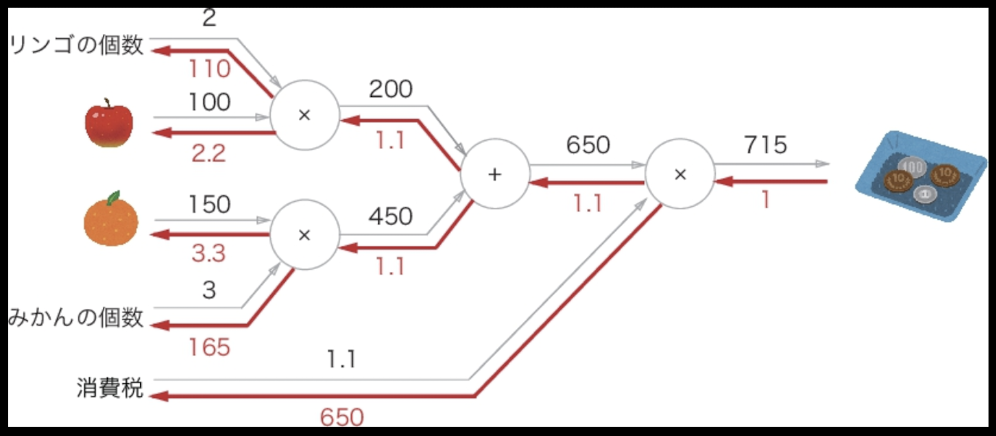


In [9]:
### 5.4.1 Multiplication Layer
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) # 220

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax) # 2.2 110 200



220.00000000000003
2.2 110.00000000000001 200


In [ ]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# Layer

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax) #(4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #(3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print("[Total Price]: ", price) # 715
print("[d(apple num)]", dapple_num, "[d(apple)]", dapple, "[d(orange)]", dorange, dorange_num, dtax) # 110 2.2 3.3 165 650


In [ ]:
## 5.3 Implementation of activation function layer

### 5.3.1 ReLU